In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
from romanisim import psf
import galsim

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

In [16]:
detector = 1
detector_position = (2048, 2048)
band = 'F184'

In [17]:
galsim_psf = psf.make_psf(sca=detector, filter_name=band, webbpsf=False, pix=detector_position)
webbpsf = psf.make_psf(sca=detector, filter_name=band, webbpsf=True, pix=detector_position)

wcs is None; unlikely to get orientation of PSF correct.


wcs is None; unlikely to get orientation of PSF correct.


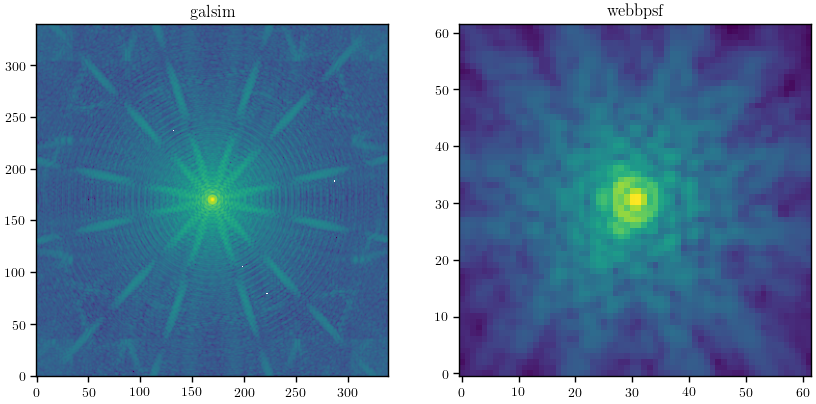

In [18]:
# compare
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(galsim_psf.drawImage().array, norm=colors.LogNorm())
ax[1].imshow(webbpsf.drawImage().array, norm=colors.LogNorm())
ax[0].set_title('galsim')
ax[1].set_title('webbpsf')
plt.show()

In [19]:
from mejiro.lenses.test import SampleStrongLens

lens = SampleStrongLens()
array = lens.get_array(num_pix=45, side=4.95, band=band)

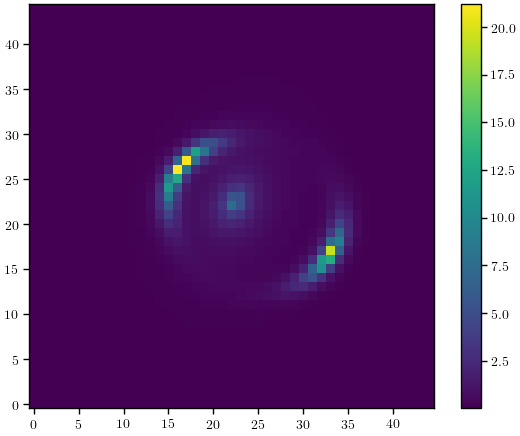

In [25]:
plt.imshow(array)
plt.colorbar()
plt.show()

In [21]:
from scipy import signal

galsim_convolved = signal.fftconvolve(array, galsim_psf.drawImage().array, mode='same')
webbpsf_convolved = signal.fftconvolve(array, webbpsf.drawImage().array, mode='same')

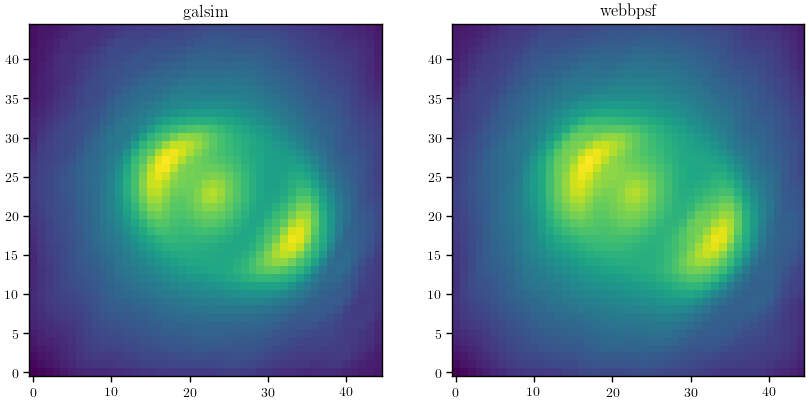

In [22]:
# compare
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(galsim_convolved, norm=colors.LogNorm())
ax[1].imshow(webbpsf_convolved, norm=colors.LogNorm())
ax[0].set_title('galsim')
ax[1].set_title('webbpsf')
plt.show()

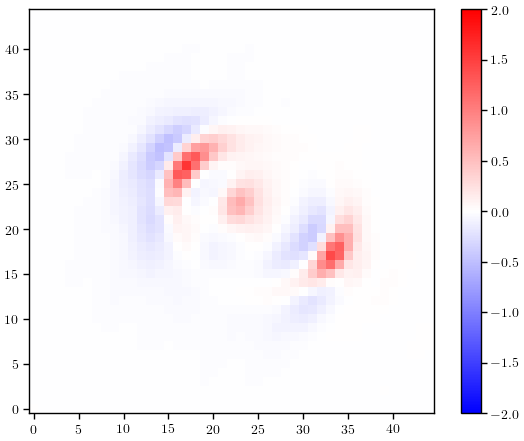

In [23]:
plt.imshow(galsim_convolved - webbpsf_convolved, cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.show()